# Using pretrained models for Named Entity Recognition (NER)

In this notebook, we are going to explore an important subfield of natural language processing, named entity recognition or NER.

By the end of today's class you'll be able to:
* Use a pretrained `spaCy` model to find named entities, especially for a non-English language
* Explain why finding named entities is challenging without the use of a pretrained token classification model
* Employ list comprehensions and advanced dictionaries in Python to parse model output
* Install spaCy and download associated models in a Colab notebook

## What is NER and why does it matter?

Named entity recognition describes any method which uses computational methods to extract from unstructured text names of people, places or things. It is a hard classification task, meaning that every word in a document is either a type of named entity or it is not. For example in the following sentences:
> My name is Peter Nadel. I work at Tufts University.

the token 'Peter Nadel' could be tagged as a PERSON tag, where as Tufts Univerisity could be tagged with a PLACE tag. Importantly, in NER, no token can receive more than one tag.

As a result, NER can be using in a wide variety of fields and applications.

## How do you do NER?
Just like many other NLP tasks, there are two main ways of conducting NER:
1. **Rules-based**: This approach involves developing a list of rules which can identify a named entity deterministically. For example, if we wanted to identify someone's name, we would develop a rule like: find two words that are capitalized next to each other. This has the advantage that we will always find the entities we have rules for, but as the disadvantage that we have to make a huge amount of rules for this approach to be effective.  
2. **Machine learning**: This apporach involves collecting and manually annotating many examples of what named entities look like in context. We can then teach a computer what a named entity looks like, allowing it to identify named entities in new texts. This has the advantage that we don't need to know exactly what a named entity looks like to work, but requires considerable manual annotation to get started.

In this notebook, we will use a machine learning *model* to conduct NER. This will be a *pretrained* model, meaning that someone else already spent the time and energy to make it so that it works and we don't need to worry about that. (However, later in the course we will train an NER model from scratch.)

## Preparing for NER

We'll be using a package called `spaCy` to conduct our NER. `spaCy` has a variety of pretrained models that we can take advantage of. The number of languages that `spaCy` support is somewhat small, but through this class we'll see how we can supplement it with other languages. For this example, we'll use `LatinCy`, a `spaCy` module for the Latin language. The model we'll be using was trained by [Patrick Burns](https://isaw.nyu.edu/people/staff/patrick-burns), a researcher at NYU's Institute for the Study of the Ancient World.

Both `spaCy` and `LatinCy` do not come with this Colab notebook by default, so we'll need to install them. We will be using `pip`, a command line tool for installing Python packages, to do so.

In [4]:
# installations: recall that we use the '!' to indicate that this is a shell command
# this cell will take about 5 min to run
!pip install spacy transformers
!python -m spacy download en_core_web_lg
!pip install "la-core-web-lg @ https://huggingface.co/latincy/la_core_web_lg/resolve/main/la_core_web_lg-any-py3-none-any.whl"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 MB 5.8 MB/s eta 0:00:00
  Cloning https://github.com/diyclassics/spacy-lookups-data.git to /tmp/pip-install-dek1791r/spacy-lookups-data_66dbc2023cbe4b3c8ffc178cc5ef51af
  Running command git clone --filter=blob:none --quiet https://github.com/diyclassics/spacy-lookups-data.git /tmp/pip-install-dek1791r/spacy-lookups-data_66dbc2023cbe4b3c8ffc178cc5ef51af
  Resolved https://github.com/diyclassics/spacy-lookups-data.git to commit 5f2b7e60d3b461cd61649c0bb75f65a242b56ece
  Preparing metadata (setup.py) ... done


## Using `spaCy` for Named Entity Recognition




### English examples

Before we turn to `LatinCy`, let's take a look at what this task looks like for some simple English texts. Then we can apply the same rationale to using the Latin model wiht complex Latin texts.

In [6]:
import spacy
english_nlp = spacy.load('en_core_web_lg') # nlp object takes in the model name and give us back a tool we can work with
english_nlp

In [7]:
# example from above
text = """
My name is Peter Nadel. I work at Tufts University.
""".strip()
doc = english_nlp(text) # call english_nlp with text to get a doc object
type(doc)

spacy.tokens.doc.Doc

In [20]:
# get entities
entities = doc.ents
for i, entity in enumerate(entities):
  print(f"Entity {i+1}: ", entity.text, "| Entity Type: ", entity.label_)

Entity 1:  Peter Nadel | Entity Type:  PERSON
Entity 2:  Tufts University | Entity Type:  ORG


In [25]:
# now let's try a more complex example: the opening of middlemarch by goerge eliot
text = """
Miss Brooke had that kind of beauty which seems to be thrown into relief by poor dress.
Her hand and wrist were so finely formed that she could wear sleeves not less bare of style
than those in which the Blessed Virgin appeared to Italian painters; and her profile as
well as her stature and bearing seemed to gain the more dignity from her plain garments,
which by the side of provincial fashion gave her the impressiveness of a fine quotation from
the Bible,—or from one of our elder poets,—in a paragraph of to-day’s newspaper.
She was usually spoken of as being remarkably clever, but with the addition that
her sister Celia had more common-sense. Nevertheless, Celia wore scarcely more
trimmings; and it was only to close observers that her dress differed from her sister’s,
and had a shade of coquetry in its arrangements; for Miss Brooke’s plain dressing was
due to mixed conditions, in most of which her sister shared. The pride of being ladies
had something to do with it: the Brooke connections, though not exactly aristocratic,
were unquestionably “good:” if you inquired backward for a generation or two, you
would not find any yard-measuring or parcel-tying forefathers—anything lower than an
admiral or a clergyman; and there was even an ancestor discernible as a Puritan gentleman
who served under Cromwell, but afterwards conformed, and managed to come out of all
political troubles as the proprietor of a respectable family estate. Young women of
such birth, living in a quiet country-house, and attending a village church hardly
larger than a parlor, naturally regarded frippery as the ambition of a huckster’s daughter.
Then there was well-bred economy, which in those days made show in dress the first item
to be deducted from, when any margin was required for expenses more distinctive of rank.
Such reasons would have been enough to account for plain dress, quite apart from religious
feeling; but in Miss Brooke’s case, religion alone would have determined it; and Celia
mildly acquiesced in all her sister’s sentiments, only infusing them with that common-sense
which is able to accept momentous doctrines without any eccentric agitation. Dorothea
knew many passages of Pascal’s Pensees and of Jeremy Taylor by heart; and to her the destinies
of mankind, seen by the light of Christianity, made the solicitudes of feminine fashion
appear an occupation for Bedlam. She could not reconcile the anxieties of a spiritual
life involving eternal consequences, with a keen interest in gimp and artificial protrusions
of drapery. Her mind was theoretic, and yearned by its nature after some lofty conception of
the world which might frankly include the parish of Tipton and her own rule of conduct
there; she was enamoured of intensity and greatness, and rash in embracing whatever
seemed to her to have those aspects; likely to seek martyrdom, to make retractations,
and then to incur martyrdom after all in a quarter where she had not sought it. Certainly
such elements in the character of a marriageable girl tended to interfere with her lot,
and hinder it from being decided according to custom, by good looks, vanity, and merely
canine affection. With all this, she, the elder of the sisters, was not yet twenty, and
they had both been educated, since they were about twelve years old and had lost their
parents, on plans at once narrow and promiscuous, first in an English family and afterwards
in a Swiss family at Lausanne, their bachelor uncle and guardian trying in this way to
remedy the disadvantages of their orphaned condition.
""".strip().replace(' \n', ' ')
doc = english_nlp(text)
entities = doc.ents
for i, entity in enumerate(entities):
  print(f"Entity {i+1}: ", entity.text, "| Entity Type: ", entity.label_)

Entity 1:  Brooke | Entity Type:  PERSON
Entity 2:  the Blessed Virgin | Entity Type:  ORG
Entity 3:  Italian | Entity Type:  NORP
Entity 4:  day | Entity Type:  DATE
Entity 5:  Celia | Entity Type:  PERSON
Entity 6:  Celia | Entity Type:  PERSON
Entity 7:  Brooke | Entity Type:  PERSON
Entity 8:  Brooke | Entity Type:  PERSON
Entity 9:  two | Entity Type:  CARDINAL
Entity 10:  Puritan | Entity Type:  NORP
Entity 11:  Cromwell | Entity Type:  ORG
Entity 12:  those days | Entity Type:  DATE
Entity 13:  first | Entity Type:  ORDINAL
Entity 14:  Brooke | Entity Type:  PERSON
Entity 15:  Celia | Entity Type:  PERSON
Entity 16:  Dorothea | Entity Type:  PERSON
Entity 17:  Pascal | Entity Type:  PERSON
Entity 18:  Pensees | Entity Type:  PRODUCT
Entity 19:  Jeremy Taylor | Entity Type:  PERSON
Entity 20:  Christianity | Entity Type:  NORP
Entity 21:  Bedlam | Entity Type:  PERSON
Entity 22:  Tipton | Entity Type:  GPE
Entity 23:  a quarter | Entity Type:  DATE
Entity 24:  twenty | Entity Typ

That's a lot more entities, so let's start store this data in a data structure. In Introduction to Digital Humanities, you probably saw how to count words in a block of text. Here we'll do a similar thing but first we'll count the number of times an entity is mentioned and then we'll count how many times a entity type is mentioned.

And we'll actually do both of these in two different ways:
* `defaultdict`: a default dictionary is a data structure in Python that functions like a dictionary, but the values are of a certain type.
* `Counter`: a dictionary that is designed for counting discrete elements of an list or string.

Additionally, for the `Counter`, we'll need to separate the entities list out into a list of entities and a list of their labels. To do so, we'll use list comprehensions. A list comprehension is a special Python syntax that allows us to put a loop on a single line. See the example below:

```python
# normal for loop
holder = []
for element in elements:
    holder.append(element)
```
``` python
# list comprehension
holder = [element for element in elements]
```
Importantly, these two blocks of code do the same thing, it's just that the list comprehension is on a single line. This can help with efficiency (though only for small- to medium-sized lists) and is easier to read.

In [28]:
# method one: defaultdict
from collections import defaultdict

entity_counts = defaultdict(int)
entity_type_counts = defaultdict(int)

# for loop for incrementing
for entity in entities:
  entity_counts[entity.text] += 1
  entity_type_counts[entity.label_] += 1

# top 3 of each
for entity_type, count in sorted(entity_type_counts.items(), key=lambda x: x[1], reverse=True)[:3]:
  print(f"{entity_type}: {count}")
print('-'*10)
for entity, count in sorted(entity_counts.items(), key=lambda x: x[1], reverse=True)[:3]:
  print(f"{entity}: {count}")

PERSON: 11
NORP: 4
DATE: 4
----------
Brooke: 4
Celia: 3
first: 2


In [29]:
# method two: Counter
from collections import Counter

# we need a two lists for entities and labels
entity_texts = [ent.text for ent in entities]
entity_labels = [ent.label_ for ent in entities]

entity_counts = Counter(entity_texts)
entity_type_counts = Counter(entity_labels)

# top 3 of each
for entity_type, count in entity_type_counts.most_common(3):
  print(f"{entity_type}: {count}")
print('-'*10)
for entity, count in entity_counts.most_common(3):
  print(f"{entity}: {count}")

PERSON: 11
NORP: 4
DATE: 4
----------
Brooke: 4
Celia: 3
first: 2


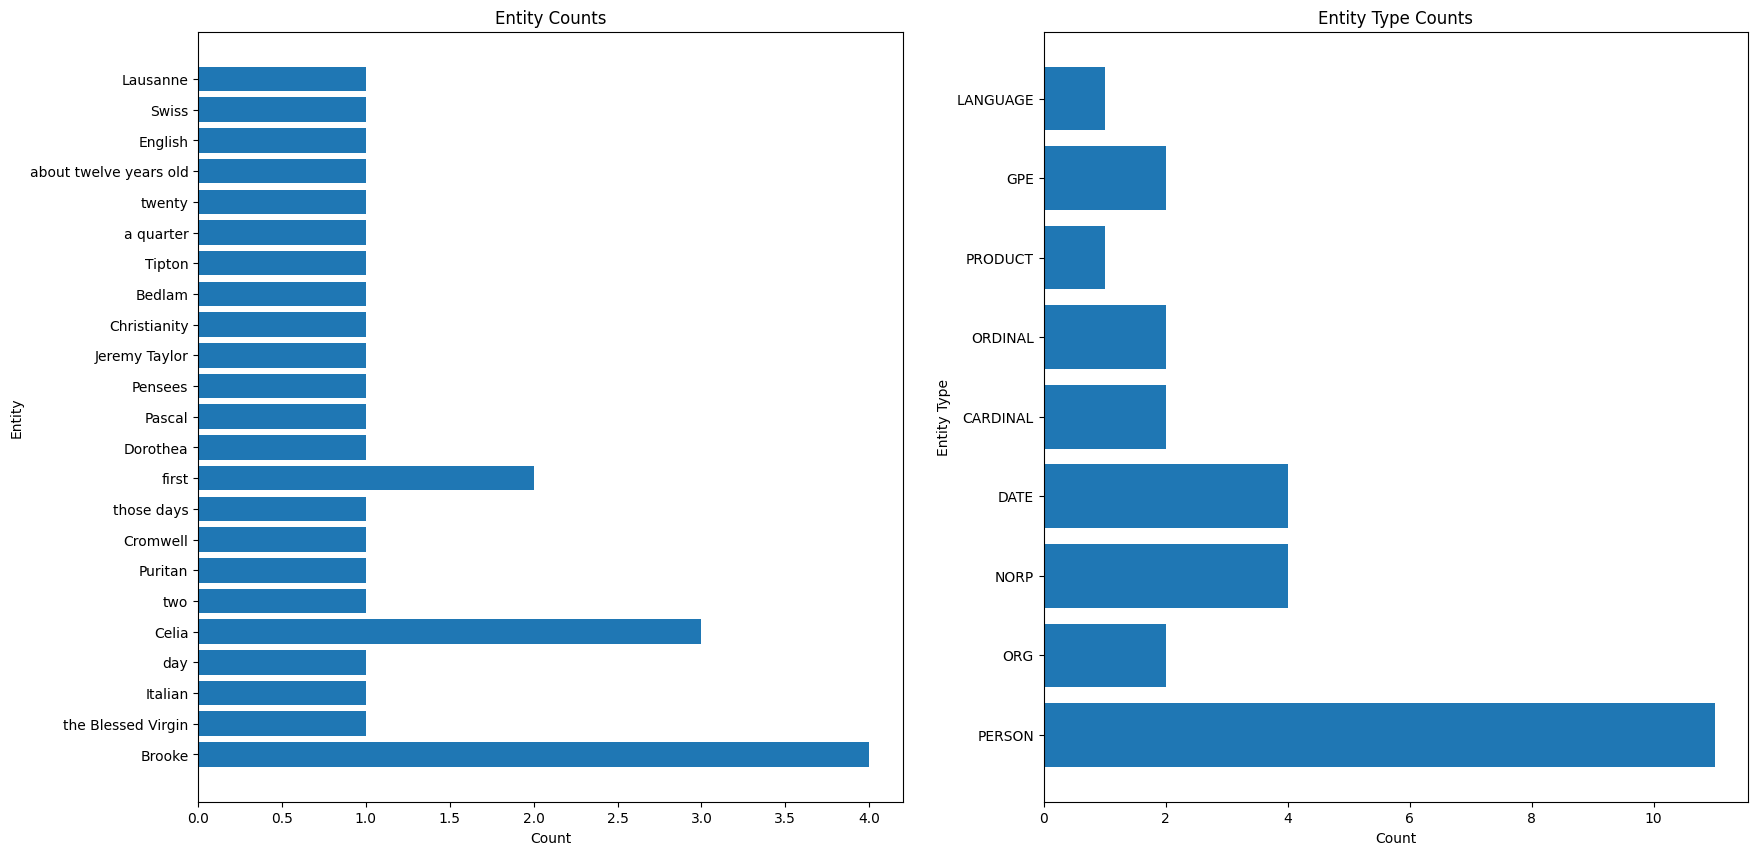

In [51]:
# we can now even plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.barh(list(entity_counts.keys()), list(entity_counts.values()))
plt.xlabel('Count')
plt.ylabel('Entity')
plt.title('Entity Counts')

plt.subplot(1, 2, 2)
plt.barh(list(entity_type_counts.keys()), list(entity_type_counts.values()))
plt.xlabel('Count')
plt.ylabel('Entity Type')
plt.title('Entity Type Counts')
plt.show()

### Non-English case: Parsing Latin texts

In [52]:
import spacy
nlp = spacy.load('la_core_web_lg') # loading the latin model instead of the english one

#### Data collection and scraping

In [57]:
# for this example we'll use Cicero's Letter's to Atticus
# here we download it in XML form and parse it with BeautifulSoup4
# if you don't remember this from the intro class, don't worry we'll revisit this in week 5
!wget https://www.perseus.tufts.edu/hopper/dltext?doc=Perseus%3Atext%3A1999.02.0008 -O atticus.xml

--2024-09-19 18:54:47--  https://www.perseus.tufts.edu/hopper/dltext?doc=Perseus%3Atext%3A1999.02.0008
Resolving www.perseus.tufts.edu (www.perseus.tufts.edu)... 130.64.212.105
Connecting to www.perseus.tufts.edu (www.perseus.tufts.edu)|130.64.212.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1400668 (1.3M) [text/xml]
Saving to: ‘atticus.xml’

atticus.xml         100%[===================>]   1.33M  7.60MB/s    in 0.2s    

2024-09-19 18:54:47 (7.60 MB/s) - ‘atticus.xml’ saved [1400668/1400668]



In [73]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(open('atticus.xml', 'r').read(), features='xml')
soup.find('div2') # first letter

<div2 n="1" org="uniform" sample="complete" type="letter">
<milestone n="1" unit="vulgate-letter"/>
<opener>
<dateline>Scr. Romae <date authname="-65-07" value="-65-7">m. Quint. a. 689 (65)</date>.</dateline>
<salute>CICERO ATTICO salutem</salute>
</opener>
<p><milestone n="1" unit="section"/>
<reg>petitionis</reg> nostrae, quam tibi summae curae esse scio, huius modi ratio est
            quod adhuc coniectura provideri possit. <reg>prensat</reg> unus P.
              Galba. <reg>sine</reg> fuco ac fallaciis more maiorum negatur. ut opinio
            est hominum, non aliena rationi nostrae fuit illius haec praepropera prensatio.
              <reg>nam</reg> illi ita negant vulgo ut mihi se debere dicant. <reg>ita</reg> quiddam
            spero nobis profici, cum hoc percrebrescit, plurimos nostros amicos inveniri.
              <reg>nos</reg> autem initium prensandi facere cogitaramus eo ipso tempore quo tuum
            puerum cum his litteris proficisci Cincius dicebat, in campo c

In [74]:
import re # need to use regular expressions to do some cleaning, we'll revisit this too

letters = []
for d in soup.find_all('div2'):
    dateline = d.dateline.extract().get_text().strip()
    salute = d.salute.extract().get_text().strip()
    text = re.sub(r'\s+', ' ', d.get_text().strip().replace('\n', ''))
    letters.append([dateline, salute, text])

print(letters[0])

['Scr. Romae m. Quint. a. 689 (65).', 'CICERO ATTICO salutem', 'petitionis nostrae, quam tibi summae curae esse scio, huius modi ratio est quod adhuc coniectura provideri possit. prensat unus P. Galba. sine fuco ac fallaciis more maiorum negatur. ut opinio est hominum, non aliena rationi nostrae fuit illius haec praepropera prensatio. nam illi ita negant vulgo ut mihi se debere dicant. ita quiddam spero nobis profici, cum hoc percrebrescit, plurimos nostros amicos inveniri. nos autem initium prensandi facere cogitaramus eo ipso tempore quo tuum puerum cum his litteris proficisci Cincius dicebat, in campo comitiis tribuniciis a. d. xvi Kalend. Sextilis. competitores, qui certi esse videantur, Galba et Antonius et Q. Cornificius. puto te in hoc aut risisse aut ingemuisse. ut frontem ferias, sunt qui etiam Caesonium putent. Aquilium non arbitrabamur, qui denegavit et iuravit morbum et illud suum regnum iudiciale opposuit. Catilina, si iudicatum erit meridie non lucere, certus erit competi

In [75]:
# now we can use pandas to store the data for each letter
import pandas as pd

df = pd.DataFrame(letters, columns=['dateline', 'salute', 'text'])
df.head()

,dateline,salute,text
0,Scr. Romae m. Quint. a. 689 (65).,CICERO ATTICO salutem,"petitionis nostrae, quam tibi summae curae ess..."
1,Scr. Romae paulo post ep. 1 a. 689 (65).,CICERO ATTICO salutem,"L. Iulio Caesare, C. Marcio Figulo consulibus ..."
2,Scr. Romae ex. a. 687 (67).,CICERO ATTICO salutem,aviam tuam scito desiderio tui mortuam esse et...
3,Scr. Romae in a. 688 (66).,CICERO ATTICO salutem,crebras exspectationes nobis tui commoves. nup...
4,Scr. Romae initio anni 687 (67).,CICERO ATTICO salutem,quantum dolorem acceperim et quanto fructu sim...


In [76]:
# example parse with one letter
first_letter = df.text.iloc[0]
first_letter_doc = nlp(first_letter)

In [78]:
first_letter_entities = first_letter_doc.ents
for i, entity in enumerate(first_letter_entities):
    print(f"Entity {i+1}: ", entity.text, "| Entity Type: ", entity.label_, "| Entity Lemma: ", entity.lemma_)
# here I also print out the words lemma, the base form of the word for counting purposes
# more on this next week

Entity 1:  P. Galba | Entity Type:  PERSON | Entity Lemma:  P. Galba
Entity 2:  Cincius | Entity Type:  PERSON | Entity Lemma:  Cincius
Entity 3:  Galba | Entity Type:  PERSON | Entity Lemma:  Galba
Entity 4:  Antonius | Entity Type:  PERSON | Entity Lemma:  Antonius
Entity 5:  Q. Cornificius | Entity Type:  PERSON | Entity Lemma:  Q. Cornificus
Entity 6:  Caesonium | Entity Type:  PERSON | Entity Lemma:  Caesonius
Entity 7:  Aquilium | Entity Type:  PERSON | Entity Lemma:  Aquilius
Entity 8:  Catilina | Entity Type:  PERSON | Entity Lemma:  Catilina
Entity 9:  Aufidio | Entity Type:  PERSON | Entity Lemma:  Aufidius
Entity 10:  Caesar | Entity Type:  PERSON | Entity Lemma:  Caesar
Entity 11:  Thermus | Entity Type:  PERSON | Entity Lemma:  Thermus
Entity 12:  Silano | Entity Type:  PERSON | Entity Lemma:  Silanus
Entity 13:  Curium | Entity Type:  PERSON | Entity Lemma:  Curius
Entity 14:  Thermum | Entity Type:  PERSON | Entity Lemma:  Thermus
Entity 15:  Caesare | Entity Type:  PERS

In [80]:
def get_entity_counts(text):
    doc = nlp(text)
    entities = doc.ents
    entity_texts = [ent.lemma_ for ent in entities] # counting lemmas not text
    entity_labels = [ent.label_ for ent in entities]
    entity_counts = Counter(entity_texts)
    entity_type_counts = Counter(entity_labels)
    return entity_counts, entity_type_counts

df['entity_counts'] = df.text.apply(get_entity_counts)
df['entity_type_counts'] = df.entity_counts.apply(lambda x: x[1]) # taking the type counts
df['entity_counts'] = df.entity_counts.apply(lambda x: x[0]) # taking the lemma counts

In [84]:
all_entity_counts = df.entity_counts.sum()
all_type_counts = df.entity_type_counts.sum()

In [94]:
# limiting the plot below to 15 so that there aren't too many
top_15_entities = sorted(all_entity_counts.items(), key=lambda x: x[1], reverse=True)[:15]
top_15_entities = dict(top_15_entities)
top_15_entities

{'Caesar': 315,
 'Pompeius': 243,
 'Brutus': 204,
 'Roma': 186,
 'Quintus': 108,
 'Antonius': 85,
 'Italia': 73,
 'Atticus': 71,
 'Dolabella': 69,
 'Cicero': 68,
 'Brundisium': 66,
 'Cato': 58,
 'balbus': 55,
 'Curio': 54,
 'Capua': 52}

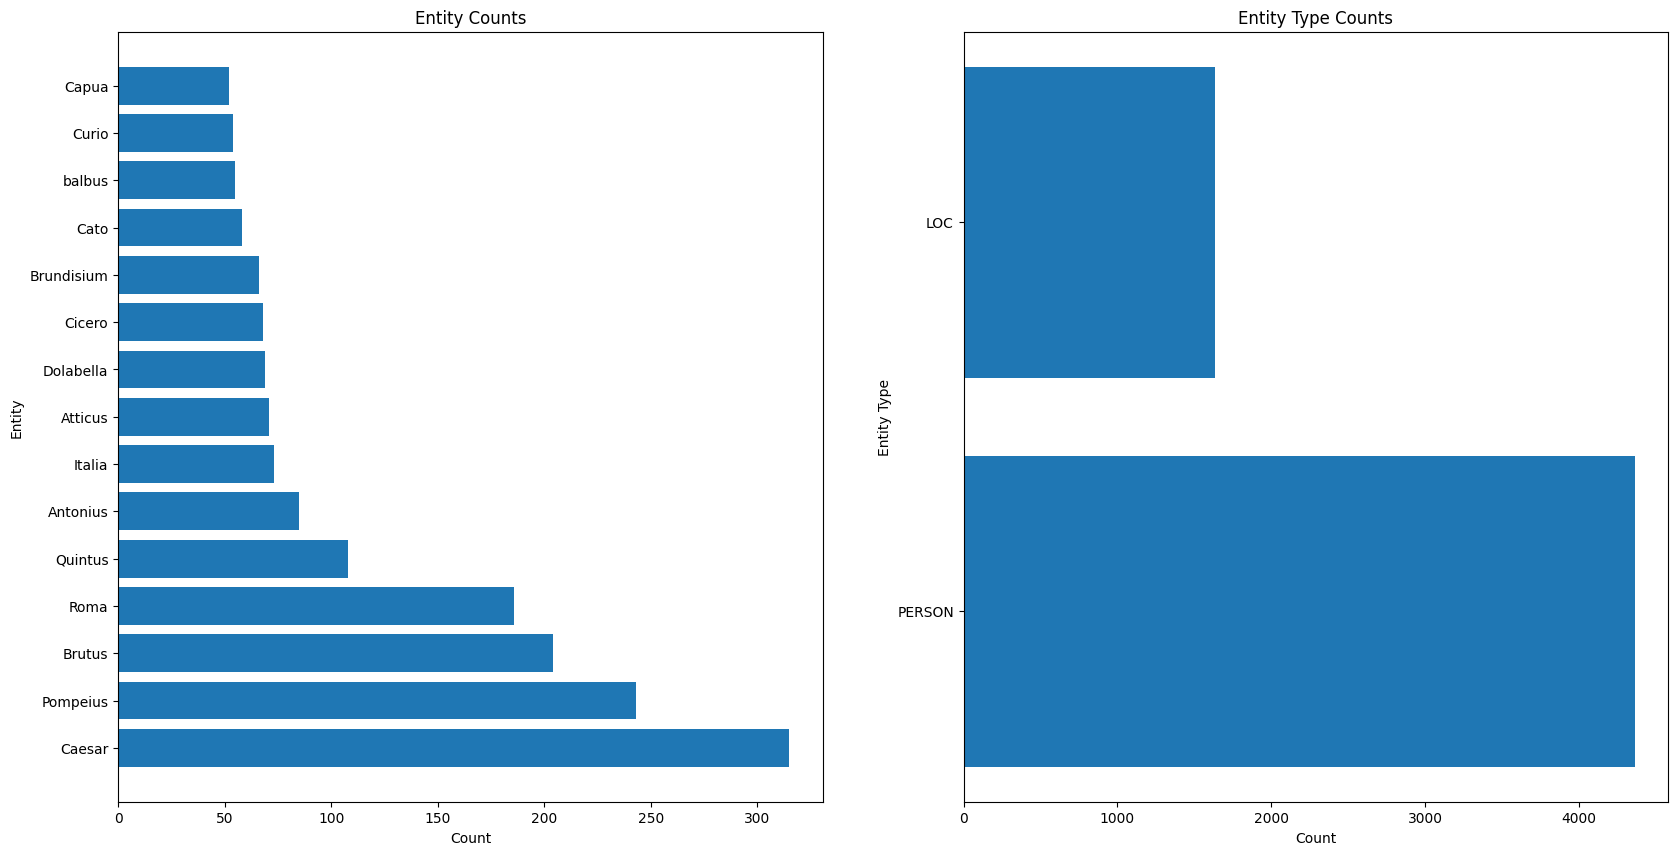

In [96]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.barh(list(top_15_entities.keys()), list(top_15_entities.values()))
plt.xlabel('Count')
plt.ylabel('Entity')
plt.title('Entity Counts')

plt.subplot(1, 2, 2)
plt.barh(list(all_type_counts.keys()), list(all_type_counts.values()))
plt.xlabel('Count')
plt.ylabel('Entity Type')
plt.title('Entity Type Counts')

plt.show()

## Conclusion

We've seen today how using specialized, pretrained models can help us do tasks like named entity recongition. We also worked on our Python skills in data parsing and plotting. In the next class, we will discuss some of the other features of `spaCy` models.